In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [22]:
mat_df = pd.read_csv('../data/raw/student-mat.csv', sep=';')
mat_df.info()

por_df = pd.read_csv('../data/raw/student-por.csv', sep=';')
por_df.info()

pd.set_option('display.max_columns', 35)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [23]:
if mat_df.columns.equals(por_df.columns):
   combined_df = pd.concat([mat_df, por_df], axis=0, ignore_index=True)

In [24]:
combined_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [25]:
combined_df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

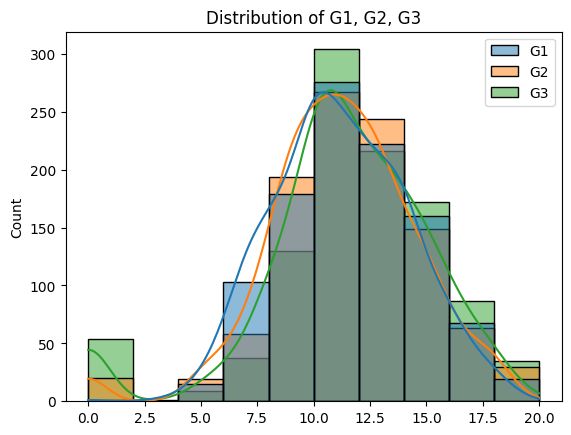

In [ ]:
sns.histplot(data = combined_df[['G1', 'G2', 'G3']], kde= True, bins = 10)
plt.title('Distribution of G1, G2, G3')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_18280\619411573.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=combined_df, x= 'sex', y='G3', palette='Set2')
C:\Users\Admin\AppData\Local\Temp\ipykernel_18280\619411573.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Female', 'Male'])


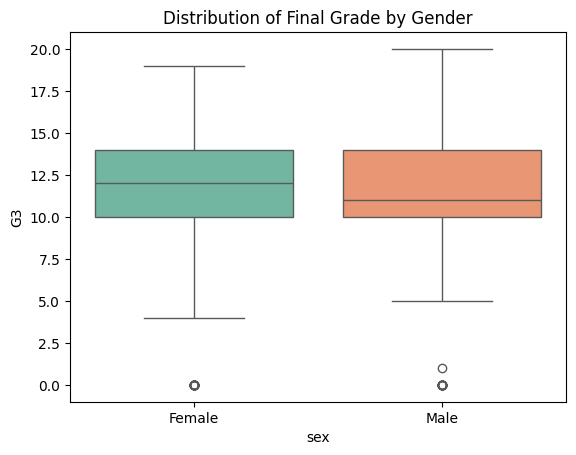

In [28]:
# boxplot for G3 by gender
ax = sns.boxplot(data=combined_df, x= 'sex', y='G3', palette='Set2')
ax.set_xticklabels(['Female', 'Male'])
plt.title('Distribution of Final Grade by Gender')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_18280\4251004700.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Urban', 'Rural'])


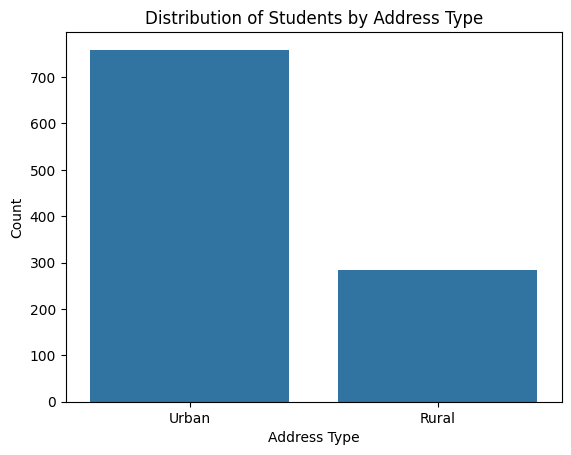

In [29]:
# Plotting the distribution of students by address type
ax = sns.countplot(data = combined_df, x = 'address')
plt.title('Distribution of Students by Address Type')
ax.set_xticklabels(['Urban', 'Rural'])
plt.xlabel('Address Type')
plt.ylabel('Count')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_18280\3945629805.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data = combined_df, x = 'studytime', y = 'G3', palette='Set2')


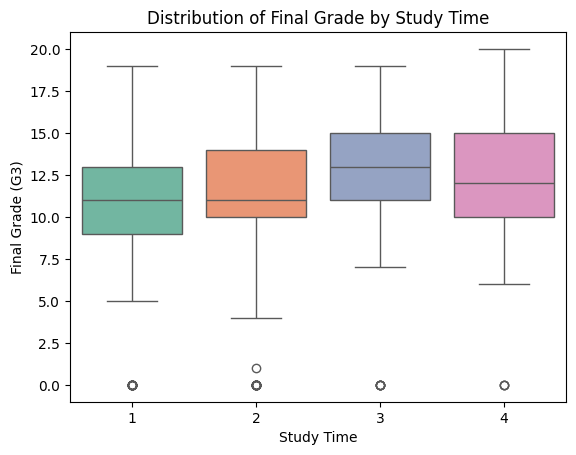

In [30]:
# Create a scatter plot to visualize the relationship between Study Time and G3
ax = sns.boxplot(data = combined_df, x = 'studytime', y = 'G3', palette='Set2')
plt.title('Distribution of Final Grade by Study Time')
plt.xlabel('Study Time')
plt.ylabel('Final Grade (G3)')
plt.show()

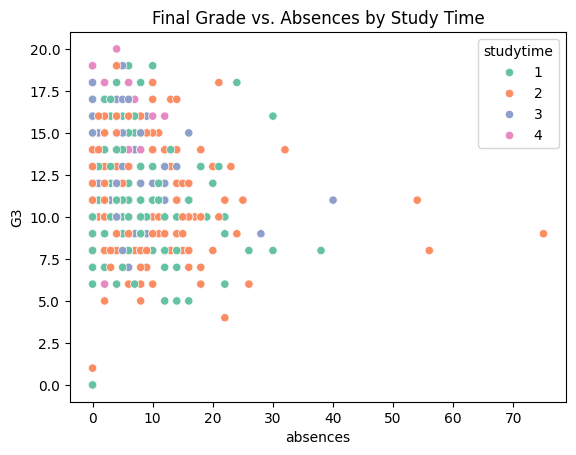

In [31]:
# Create a scatter plot to visualize the relationship between absences and final grade (G3) by study time
ax = sns.scatterplot(data = combined_df, x = 'absences', y = 'G3', hue = 'studytime',palette='Set2')
plt.title('Final Grade vs. Absences by Study Time')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_18280\2879966767.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data = combined_df, x = 'reason', y = 'G3', palette='Spectral')


Text(0.5, 0, 'Study methods')

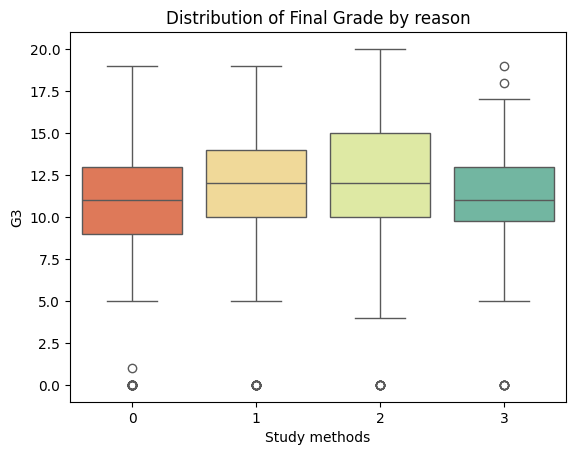

In [41]:
ax = sns.boxplot(data = combined_df, x = 'reason', y = 'G3', palette='Spectral')
plt.title('Distribution of Final Grade by reason')
plt.xlabel('Study methods')

Processing data to use

In [33]:
combined_df.drop(['school', 'address'], axis = 1, inplace=True)

convert_binary_col = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'Fjob', 'Mjob', 'reason', 'guardian', 'Pstatus','famsize','sex']

bin_map = {'yes': 1, 'no': 0, 'father': 1, 'mother': 0, 'GT3': 1, 'LE3': 0, 'A': 1, 'T': 0, 'F': 0, 'M': 1,
                                   'course': 0, 'home': 1,'reputation': 2 ,'at_home': 0, 'health': 1, 'services': 2, 'teacher': 4,'other': 3}

for col in convert_binary_col:
    combined_df[col] = combined_df[col].map(bin_map)

combined_df.head()

,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,18,1,1,4,4,0,4,0,0,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,0,17,1,0,1,1,0,3,0,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,0,15,0,0,1,1,0,3,3,0,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,0,15,1,0,4,2,1,2,1,0,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,0,16,1,0,3,3,3,3,1,1,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10


In [34]:
combined_df['Mjob'].unique(), combined_df['Fjob'].unique()

(array([0, 1, 3, 2, 4], dtype=int64), array([4, 3, 2, 1, 0], dtype=int64))

In [35]:
combined_df['guardian'].unique(), combined_df['reason'].unique()

(array([0, 1, 3], dtype=int64), array([0, 3, 1, 2], dtype=int64))

In [36]:
mean = combined_df.mean()
std = combined_df.std()
z_scores = (combined_df - mean) / std
threshold = 4
outliers = combined_df[(z_scores.abs() > threshold).any(axis=1)]
print(f"Number of outliers: {len(outliers)}")
if not outliers.empty:
    print("Outliers found at indices:")
    print(outliers.index.tolist())
    print("Outliers found:")
    print(outliers.head(10))
else:
    print("No outliers found")


Number of outliers: 38
Outliers found at indices:
[2, 18, 74, 78, 127, 144, 146, 149, 150, 153, 157, 164, 173, 183, 206, 247, 276, 280, 307, 315, 350, 392, 413, 473, 526, 564, 565, 574, 592, 607, 632, 674, 873, 938, 952, 963, 966, 1005]
Outliers found:
     sex  age  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  reason  guardian  \
2      0   15        0        0     1     1     0     3       3         0   
18     1   17        1        0     3     2     2     2       0         0   
74     0   16        1        0     3     3     3     2       1         0   
78     1   17        1        0     2     1     3     3       1         0   
127    0   19        1        0     0     1     0     3       0         3   
144    1   17        1        0     2     1     3     3       1         0   
146    0   15        1        0     3     2     1     2       1         1   
149    1   15        0        1     2     1     2     3       0         0   
150    1   18        0        0     1     1     3     

In [45]:
from sklearn.preprocessing import MinMaxScaler

feature = combined_df.drop(['G3'], axis=1)
scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(feature)
processed_data = pd.DataFrame(normalized_data, columns=feature.columns)
processed_data['G3'] = combined_df['G3'].values

processed_data.head()


,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0.0,0.428571,1.0,1.0,1.00,1.00,0.00,1.00,0.000000,0.000000,0.333333,0.333333,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.75,0.50,0.75,0.00,0.00,0.5,0.080000,0.263158,0.315789,6
1,0.0,0.285714,1.0,0.0,0.25,0.25,0.00,0.75,0.000000,0.333333,0.000000,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.00,0.50,0.50,0.00,0.00,0.5,0.053333,0.263158,0.263158,6
2,0.0,0.000000,0.0,0.0,0.25,0.25,0.00,0.75,1.000000,0.000000,0.000000,0.333333,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.75,0.50,0.25,0.25,0.50,0.5,0.133333,0.368421,0.421053,10
3,0.0,0.000000,1.0,0.0,1.00,0.50,0.25,0.50,0.333333,0.000000,0.000000,0.666667,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.50,0.25,0.25,0.00,0.00,1.0,0.026667,0.789474,0.736842,15
4,0.0,0.142857,1.0,0.0,0.75,0.75,0.75,0.75,0.333333,0.333333,0.000000,0.333333,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.75,0.50,0.25,0.00,0.25,1.0,0.053333,0.315789,0.526316,10


In [47]:
processed_data.to_csv('../data/processed/data_processed.csv', index = False)